# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [56]:
loans = pd.read_csv('loan_data.csv')

In [58]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

** Check out the info(), head(), and describe() methods on loans.**

In [59]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [60]:
dfDescribe=pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, loans.dtypes[col], sum(loans[col].isna()),round(100*sum(loans[col].isna())/len(loans[col]),2),loans[col].nunique(),list(loans[col].unique()[:])]for col in loans.columns])
                                                                  
dfDescribe

dataFeatures dataType  null  nullPct  unique  \
0       credit.policy    int64     0      0.0       2   
1             purpose   object     0      0.0       7   
2            int.rate  float64     0      0.0     249   
3         installment  float64     0      0.0    4788   
4      log.annual.inc  float64     0      0.0    1987   
5                 dti  float64     0      0.0    2529   
6                fico    int64     0      0.0      44   
7   days.with.cr.line  float64     0      0.0    2687   
8           revol.bal    int64     0      0.0    7869   
9          revol.util  float64     0      0.0    1035   
10     inq.last.6mths    int64     0      0.0      28   
11        delinq.2yrs    int64     0      0.0      11   
12            pub.rec    int64     0      0.0       6   
13     not.fully.paid    int64     0      0.0       2   

                                         uniqueSample  
0                                              [1, 0]  
1   [debt_consolidation, credit_card, all_other, h...  
2   [0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...  
3   [829.1, 228.22, 366.86, 162.34, 102.92, 125.13...  
4   [11.35040654, 11.08214255, 10.37349118, 11.299...  
5   [19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...  
6   [737, 707, 682, 712, 667, 727, 722, 677, 662, ...  
7   [5639.958333, 2760.0, 4710.0, 2699.958333, 406...  
8   [28854, 33623, 3511, 33667, 4740, 50807, 3839,...  
9   [52.1, 76.7, 25.6, 73.2, 39.5, 51.0, 76.8, 68....  
10  [0, 1, 2, 3, 4, 5, 6, 8, 7, 33, 9, 18, 14, 15,...  
11                [0, 1, 2, 4, 3, 5, 6, 13, 7, 8, 11]  
12                                 [0, 1, 2, 3, 4, 5]  
13                                             [0, 1]

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees o

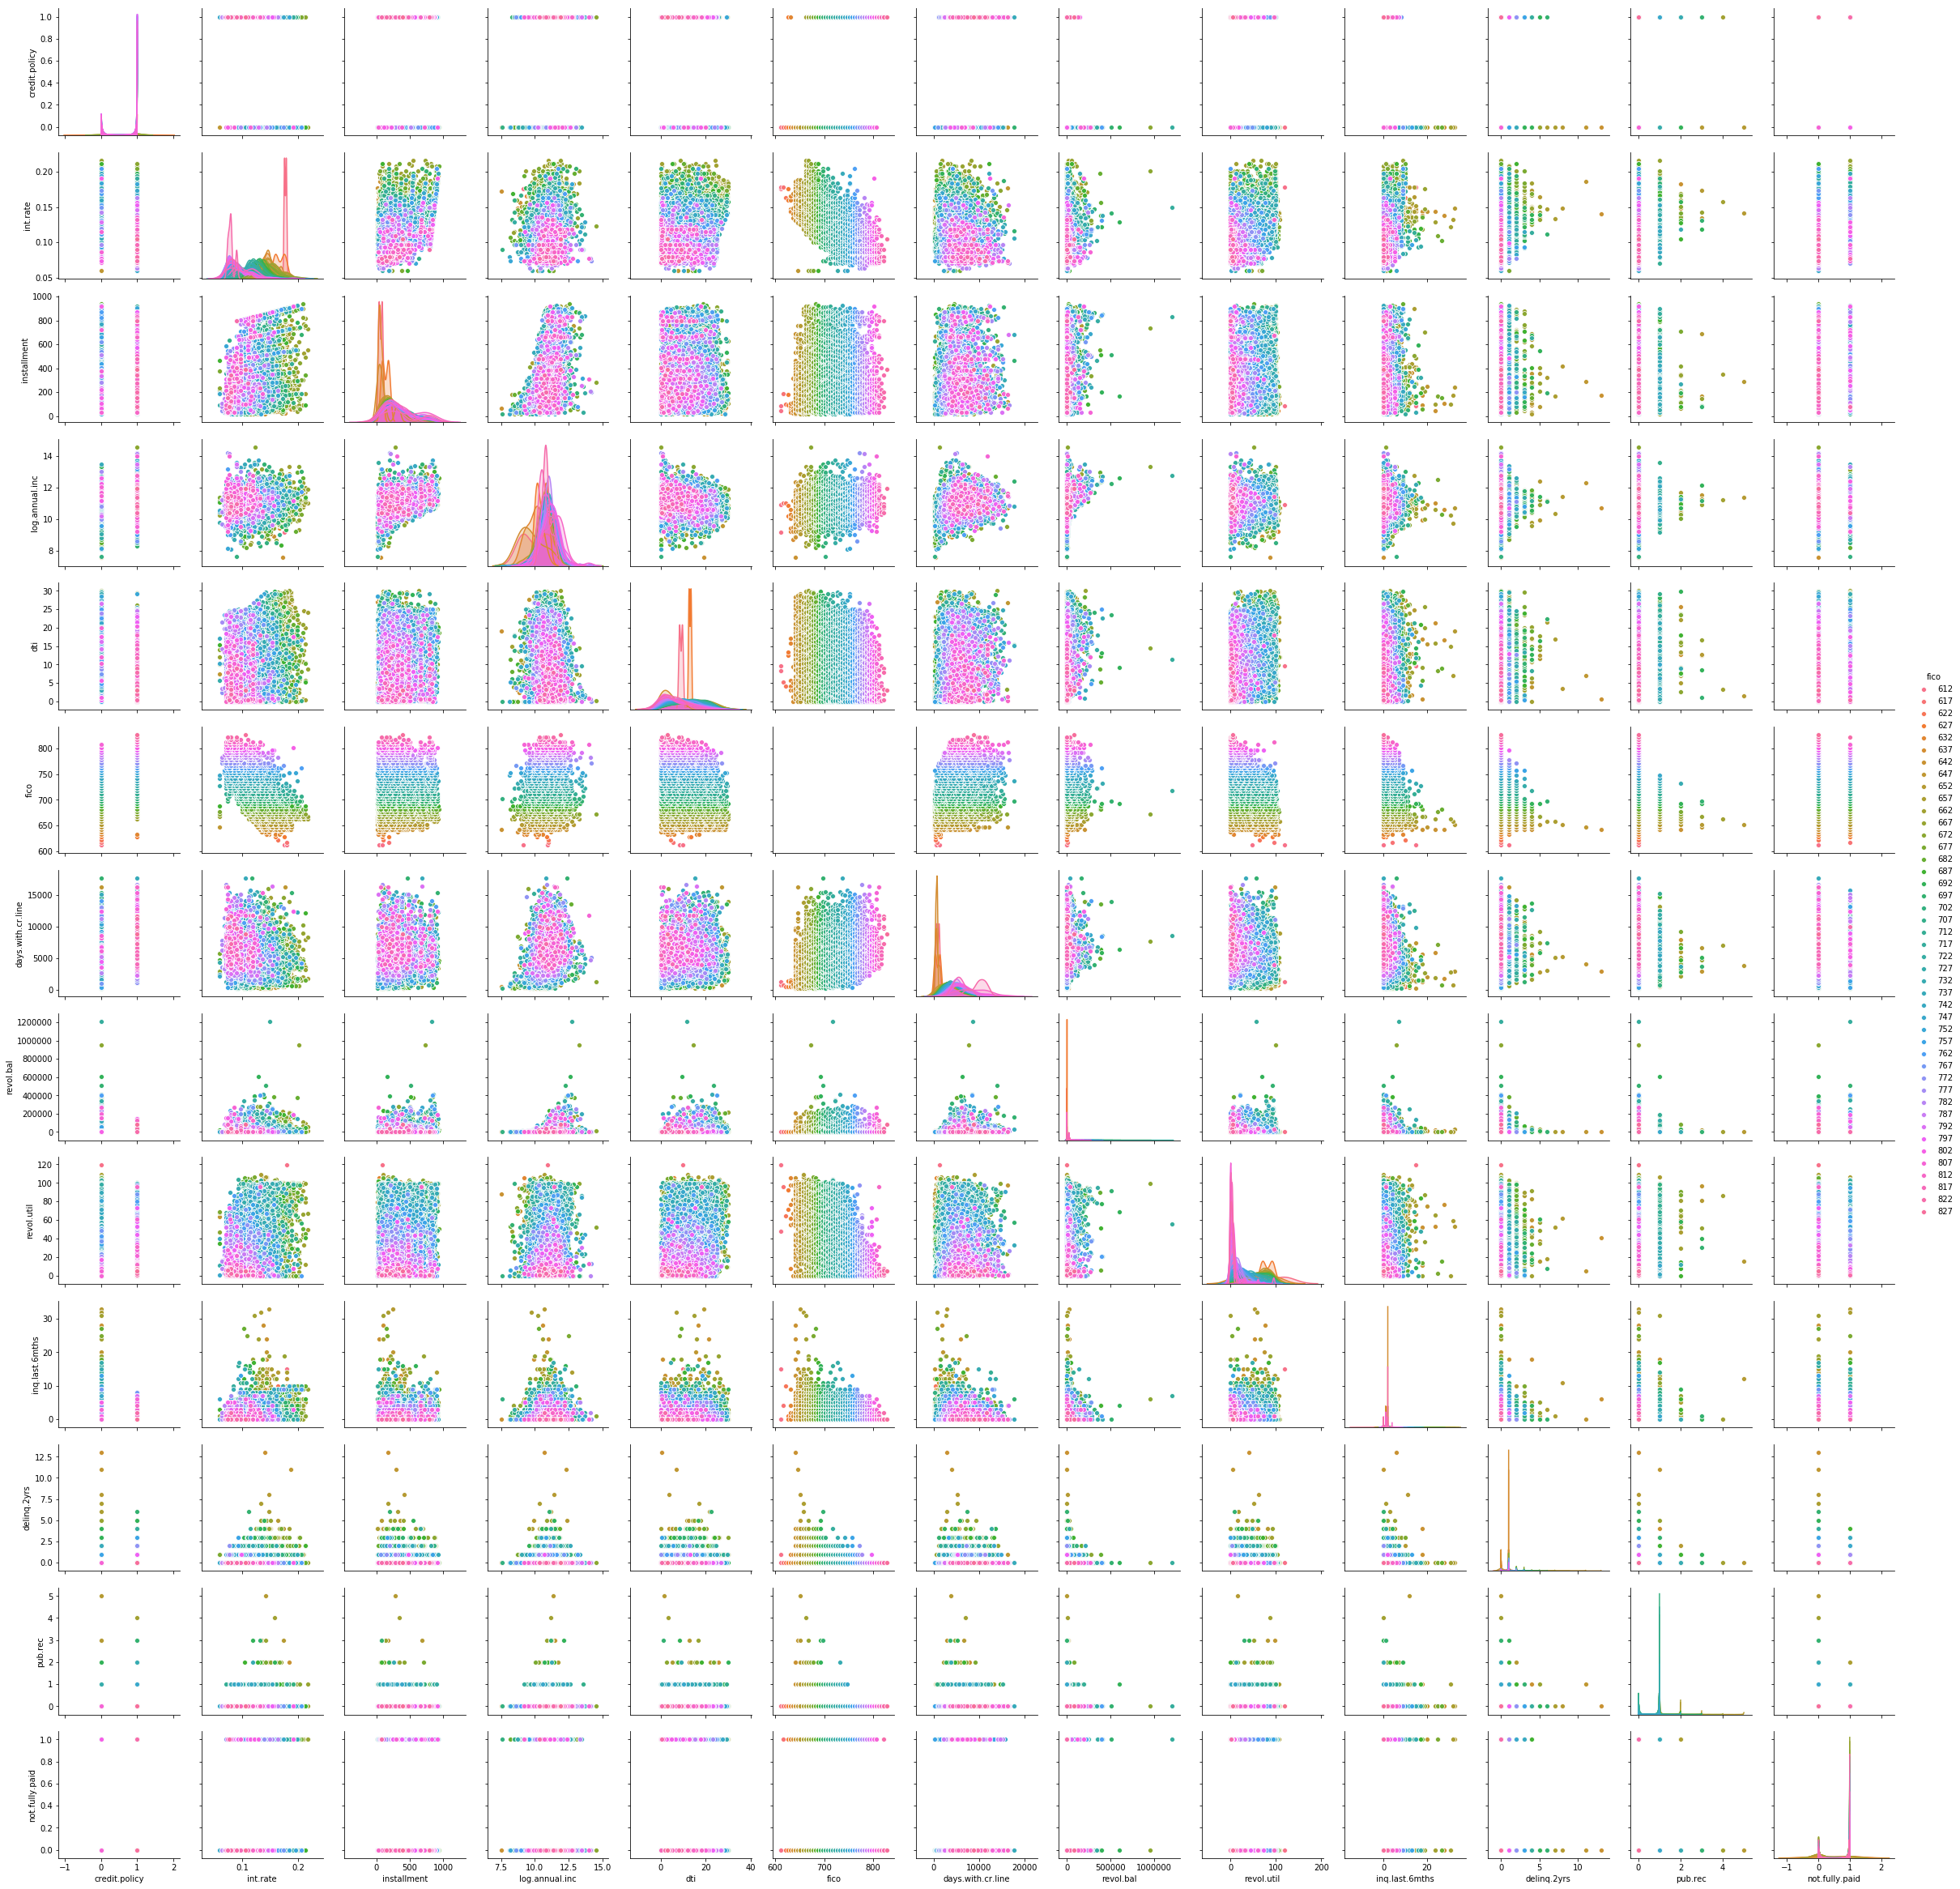

In [7]:
sns.pairplot(loans, hue="fico")


Text(0.5,0,'Fico')

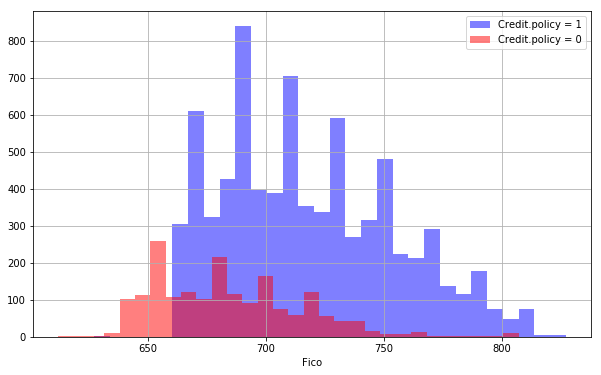

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1 ]['fico'].hist(alpha=0.5,color = 'blue',bins=30,label='Credit.policy = 1')
loans[loans['credit.policy'] == 0 ]['fico'].hist(alpha=0.5,color = 'red',bins=30,label='Credit.policy = 0')
plt.legend()
plt.xlabel('Fico')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5,0,'Fico')

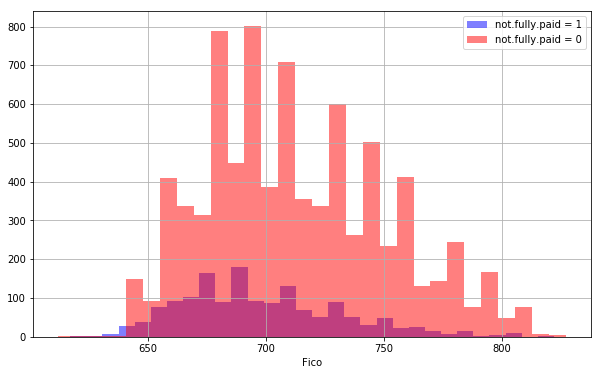

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 1 ]['fico'].hist(alpha=0.5,color = 'blue',bins=30,label='not.fully.paid = 1')
loans[loans['not.fully.paid'] == 0 ]['fico'].hist(alpha=0.5,color = 'red',bins=30,label='not.fully.paid = 0')
plt.legend()
plt.xlabel('Fico')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

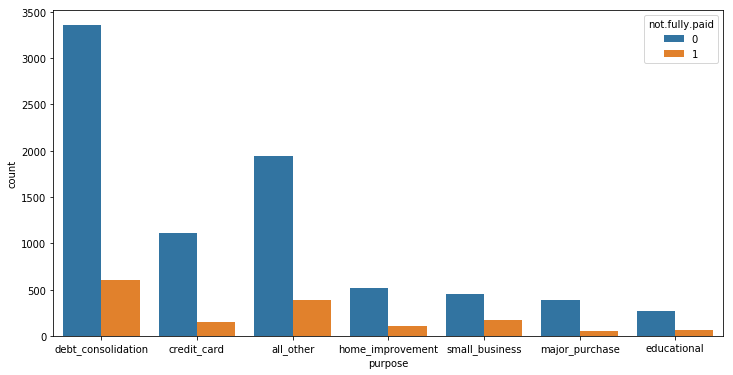

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x="purpose", hue="not.fully.paid", data=loans)

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


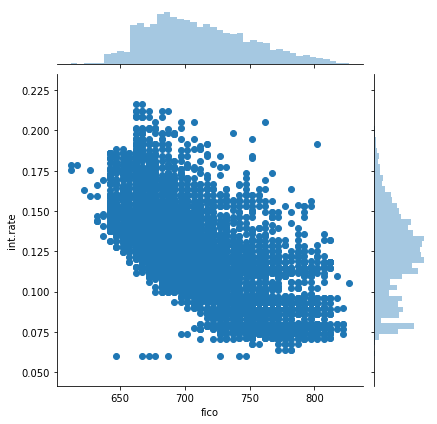

In [11]:
sns.jointplot(x="fico", y="int.rate", data=loans)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x576 with 0 Axes>

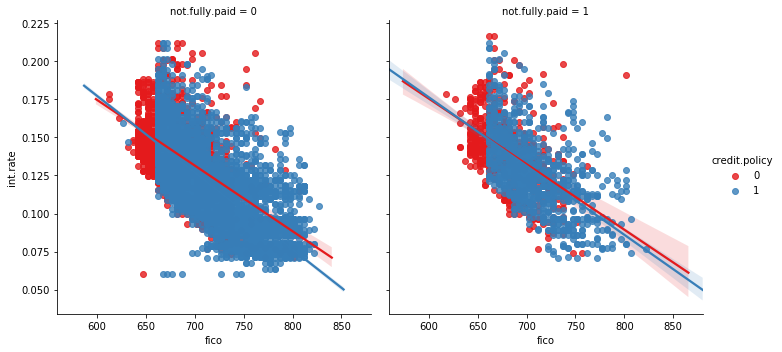

In [12]:
plt.figure(figsize=(12,8))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [13]:
a1 = len(loans[(loans['purpose'] == 'debt_consolidation') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'debt_consolidation')])*100
a2 = len(loans[(loans['purpose'] == 'all_other') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'all_other')])*100
a3 = len(loans[(loans['purpose'] == 'credit_card') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'credit_card')])*100
a4 = len(loans[(loans['purpose'] == 'home_improvement') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'home_improvement')])*100
a5 = len(loans[(loans['purpose'] == 'small_business') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'small_business')])*100
a6 = len(loans[(loans['purpose'] == 'major_purchase') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'major_purchase')])*100
a7 = len(loans[(loans['purpose'] == 'educational') & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == 'educational')])*100

s1 = pd.Series(data=[a1,a2,a3,a4,a5,a6,a7])
s1

0    84.761183
1    83.397683
2    88.431062
3    82.988871
4    72.213247
5    88.787185
6    79.883382
dtype: float64

In [14]:
b1 = len(loans[(loans['purpose'] == 'debt_consolidation') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'debt_consolidation')])*100
b2 = len(loans[(loans['purpose'] == 'all_other') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'all_other')])*100
b3 = len(loans[(loans['purpose'] == 'credit_card') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'credit_card')])*100
b4 = len(loans[(loans['purpose'] == 'home_improvement') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'home_improvement')])*100
b5 = len(loans[(loans['purpose'] == 'small_business') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'small_business')])*100
b6 = len(loans[(loans['purpose'] == 'major_purchase') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'major_purchase')])*100
b7 = len(loans[(loans['purpose'] == 'educational') & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == 'educational')])*100

s2 = pd.Series(data=[b1,b2,b3,b4,b5,b6,b7])
s2

0    15.238817
1    16.602317
2    11.568938
3    17.011129
4    27.786753
5    11.212815
6    20.116618
dtype: float64

In [15]:
pd.Series((loans['purpose'].value_counts())) 


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [16]:
dfPurpose=pd.DataFrame(columns='Purpose Full-% Not-FUll-%'.split(),
                        data=[pd.Series(loans['purpose'].unique()),
                              s1,s2])
                                                                  
dfPurpose

Purpose  Full-%  Not-FUll-%
0      NaN     NaN         NaN
1      NaN     NaN         NaN
2      NaN     NaN         NaN

In [17]:
concat = pd.concat([pd.Series(loans['purpose'].unique()),s1,s2],axis=1)
concat


0          1          2
0  debt_consolidation  84.761183  15.238817
1         credit_card  83.397683  16.602317
2           all_other  88.431062  11.568938
3    home_improvement  82.988871  17.011129
4      small_business  72.213247  27.786753
5      major_purchase  88.787185  11.212815
6         educational  79.883382  20.116618

In [71]:
listitem=[]

for i in loans['purpose'].unique():
    listitem.append([i,
                     (len(loans[(loans['purpose'] == i) & (loans['not.fully.paid'] == 0)/len(loans[loans['purpose'] == i])]))* (100),
                     (len(loans[(loans['purpose'] == i) & (loans['not.fully.paid'] == 1)/len(loans[loans['purpose'] == i])]))* (100)])
dfpercent = pd.DataFrame(listitem, columns='Purpose Full-% Not-FUll-%'.split())


In [72]:
dfpercent

Purpose  Full-%  Not-FUll-%
0  debt_consolidation  335400       60300
1         credit_card  111600       14600
2           all_other  194400       38700
3    home_improvement   52200       10700
4      small_business   44700       17200
5      major_purchase   38800        4900
6         educational   27400        6900

In [73]:
listitem = []
for purpose in loans['purpose'].unique():
    listitem.append([
        purpose,
        len(loans[(loans['purpose'] == purpose) & (loans['not.fully.paid'] == 1)])/len(loans[(loans['purpose'] == purpose)])*100,
        len(loans[(loans['purpose'] == purpose) & (loans['not.fully.paid'] == 0)])/len(loans[(loans['purpose'] == purpose)])*100
                   ])


In [74]:
dfPurposePaid = pd.DataFrame(listitem, columns=['purpose','Full %', 'Not Full %'])
dfPurposePaid

purpose     Full %  Not Full %
0  debt_consolidation  15.238817   84.761183
1         credit_card  11.568938   88.431062
2           all_other  16.602317   83.397683
3    home_improvement  17.011129   82.988871
4      small_business  27.786753   72.213247
5      major_purchase  11.212815   88.787185
6         educational  20.116618   79.883382

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [26]:
purpose = pd.get_dummies(loans['purpose'],drop_first=True)

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [28]:
loans.drop(['purpose'],axis=1,inplace=True)

In [31]:
loans = pd.concat([loans,purpose],axis=1)

In [32]:
loans.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [37]:
from sklearn.model_selection import train_test_split

In [36]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [42]:
predictions = dtree.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84      2420
          1       0.21      0.23      0.22       454

avg / total       0.75      0.74      0.74      2874



In [45]:
print(confusion_matrix(y_test,predictions))

[[2016  404]
 [ 349  105]]


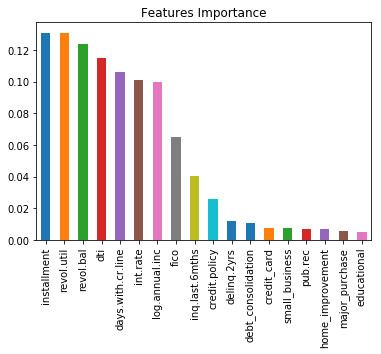

In [46]:
coef1 = pd.Series(dtree.feature_importances_, X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title = 'Features Importance')

## Tree Visualization 

In [47]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business']

In [48]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rfc_pred = rfc.predict(X_test) 

In [51]:
print(confusion_matrix(y_test,rfc_pred))

[[2408   12]
 [ 446    8]]


## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [52]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2420
          1       0.40      0.02      0.03       454

avg / total       0.77      0.84      0.77      2874



**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

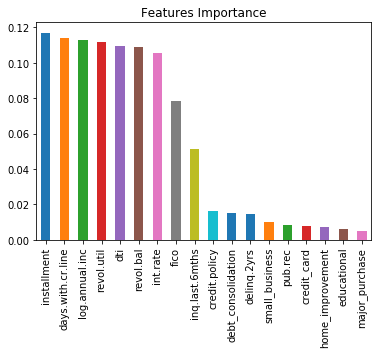

In [53]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title = 'Features Importance')

**Show the Confusion Matrix for the predictions.**

**What performed better the random forest or the decision tree?**

# Great Job!